In [1]:
from sklearn.datasets import load_iris
import skfuzzy as fuzz
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

data = load_iris()
X = data.data
# Adding random features to X
X = np.hstack((X,np.random.rand(len(X),1)))
Y = data.target

In [2]:
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        X.T, 3, 60, error=0.0001, maxiter=100000, init=None)

In [3]:
l = [[0]*3 for i in range(3)]
for i in range(len(Y)):
    l[Y[i]][np.argmax(u[:,i])]+=1

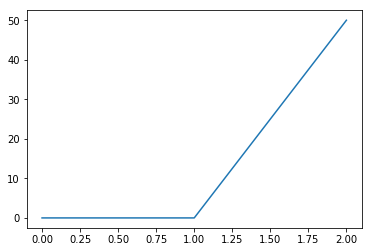

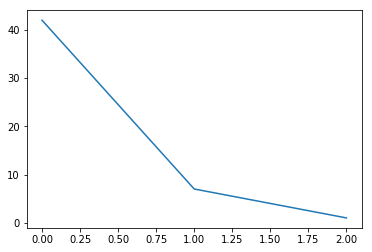

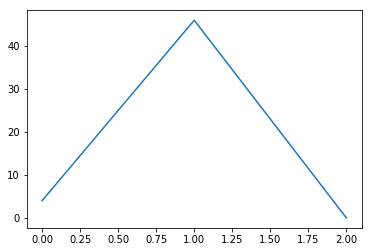

In [4]:
for i in range(3):
    plt.plot(l[i])
    plt.show()

# Creating the CF Matrix

In [5]:
clu = 1
CF = np.zeros((X.shape[1],X.shape[1]))
for i in range(X.shape[1]):
    for j in range(X.shape[1]):
        summ=0
        for d in range(X.shape[0]):
            if np.argmax(u[:,d]) == clu:
                summ+=X[d][i]*X[d][j]
        CF[i,j]=summ

# Normalization

In [6]:
NCF = np.zeros((X.shape[1],X.shape[1]))
for i in range(X.shape[1]):
    for j in range(X.shape[1]):
        NCF[i,j]=CF[i,j]/(CF[i,j]+CF[j,j]-CF[i,j])

# Centroid

In [7]:
SC = np.zeros(X.shape[1])
for i in range(X.shape[1]):
    SC[i] = np.sum(NCF[i,:])

# Cosine Similarity to select top features

In [8]:
cosim = cosine_similarity(SC,CF)
print(cosim)
top = 4
print("Top features are: ",(-cosim).argsort()[0][:top])

[[ 0.99994296  0.99994182  0.99994363  0.99992361  0.99997326]]
Top features are:  [4 2 0 1]


/home/a/workspace/venv/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
